In [108]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson, norm

In [2]:
infile = open("qcd_100000_pt_1000_1200.pkl",'rb')
bkg = pickle.load(infile)
infile = open("higgs_100000_pt_1000_1200.pkl",'rb')
signal = pickle.load(infile)

In [7]:
bkg.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1034.181543,1.193191,2.942234,272.010881,0.102485,0.003492,3.244343,0.006256,0.961697,0.598986,0.425024,0.622843,0.709573,0.082995
1,1125.535509,-1.833090,0.121390,139.794408,0.035430,0.000288,6.481473,0.000155,0.896003,0.633385,0.476566,0.706900,0.752412,0.439346
2,1099.223087,0.557867,-1.238027,245.413146,0.099080,0.002563,2.634788,0.005682,0.861678,0.486505,0.264631,0.564602,0.543942,0.251453
3,1118.230032,1.505473,1.953123,89.975916,0.017950,0.000077,13.389845,0.000432,0.952917,0.856141,0.730438,0.898442,0.853175,0.121666
4,1059.907996,-0.387179,-1.064832,85.893956,0.018515,0.000072,11.342156,0.002575,0.868770,0.645362,0.484853,0.742845,0.751289,0.386788


In [80]:
signal.head()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,1130.533498,0.075569,-2.535979,126.390705,0.050194,0.000198,1.565921,0.000846,0.710011,0.318588,0.201156,0.448709,0.631396,0.236212
1,1040.287356,-0.917809,-0.511002,125.735472,0.068068,0.000259,0.822408,0.000093,1.070693,0.243505,0.149150,0.227427,0.612512,0.223529
2,1042.978241,0.431547,-1.287136,125.946948,0.054627,0.000189,1.159519,0.000493,0.707240,0.196842,0.161801,0.278324,0.821986,0.284253
3,1173.988224,-1.000457,-0.567291,133.475055,0.057164,0.000211,1.131290,0.000316,1.586268,0.213899,0.137810,0.134844,0.644277,0.216328
4,1158.143085,-0.205305,2.778395,135.047319,0.028222,0.000114,5.084335,0.004804,0.644669,0.259307,0.242958,0.402232,0.936954,0.443097



##### 1)
According to the documentation, for the high pT range, we expect the number of background events to be $N_{qcd} = 2000$ and the number of signal events to be $N_{higgs} = 50$. This means our background should be a Poisson distribution with a mean of 2000, and the significance will be calculated as a count of $N_{qcd}+N_{higgs} = 2050$ events.

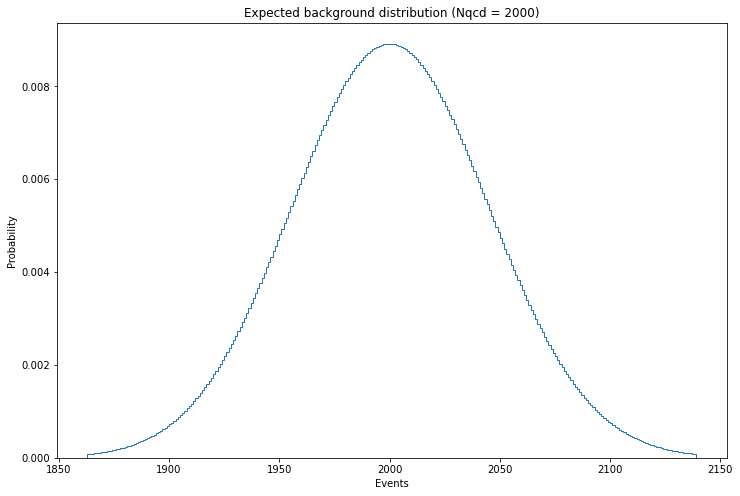

In [104]:
mu = 2000
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.999, mu))
fig,ax=plt.subplots(figsize=(12,8))
plt.stairs(poisson.pmf(x, mu)[:-1],x)
plt.title('Expected background distribution (Nqcd = 2000)')
plt.xlabel('Events')
plt.ylabel('Probability')
plt.show()

In [113]:
p = poisson.sf(2050,mu)
sig = abs(norm.ppf(p))
print(f'The probability of finding 2050 events in the background is {p:0.3f}, which is a signficants of {sig:0.3f}.')

The probability of finding 2050 events in the background is 0.130, which is a signficants of 1.128.


The significance for this signal is only $1.128\sigma$, which is extremely far below the $5\sigma$ discovery threshold.

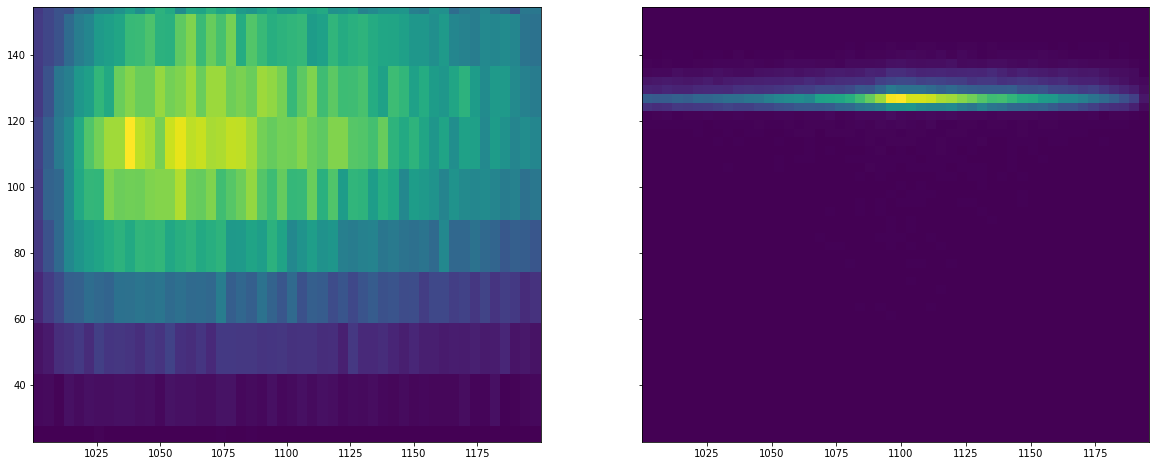

In [68]:
fig, ax = plt.subplots(1,2, figsize=(20,8),sharey=True)
ax[0].hist2d(bkg['pt'], bkg['mass'], bins=50)
ax[1].hist2d(signal['pt'], signal['mass'], bins=50)

plt.show()

In [138]:
cut_bkg = bkg[(bkg['mass']>120) &  (bkg['mass'] < 140)]
cut_signal = signal[(signal['mass']>120) &  (signal['mass'] < 140)]
len(cut_bkg), len(cut_signal)
n_bkg = len(cut_bkg)

n_signal = 50/2000 * n_bkg

312.875

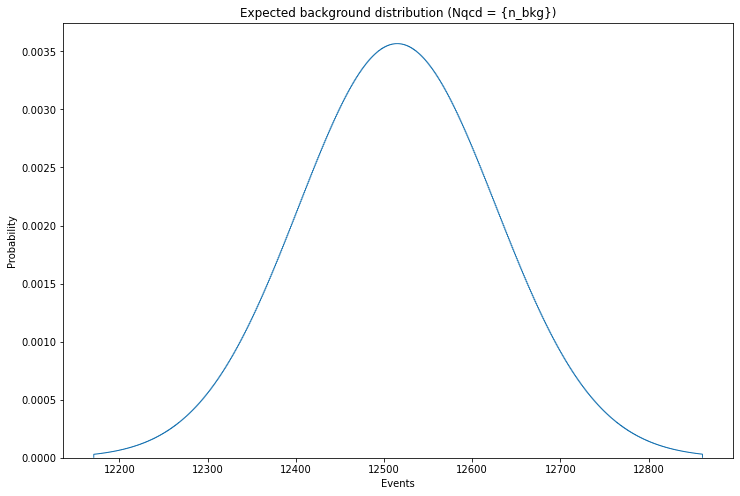

In [146]:
mu = n_bkg
x = np.arange(poisson.ppf(0.001, mu),
              poisson.ppf(0.999, mu))
fig,ax=plt.subplots(figsize=(12,8))
plt.stairs(poisson.pmf(x, mu)[:-1],x)
plt.title('Expected background distribution (Nqcd = {n_bkg})')
plt.xlabel('Events')
plt.ylabel('Probability')
plt.show()

In [149]:
p = poisson.sf(n_bkg+n_signal,mu)
sig = abs(norm.ppf(p))
print(f'The probability of finding {n_bkg+n_signal:0.0f} events in the background is {p:0.3e}, which is a signficance of {sig:0.3f}.')

The probability of finding 12828 events in the background is 2.690e-03, which is a signficance of 2.783.


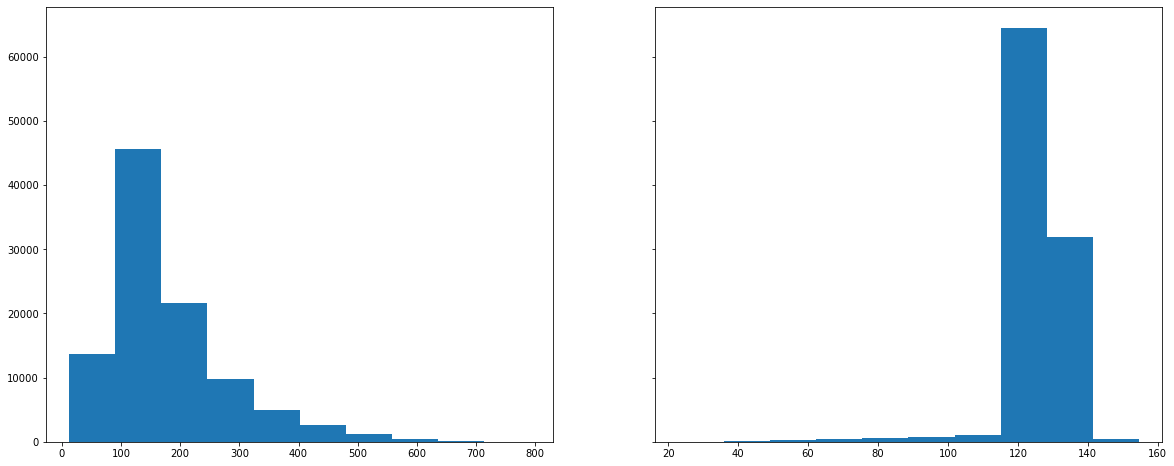

In [77]:
fig, ax = plt.subplots(1,2, figsize=(20,8),sharey=True)
ax[0].hist(stats.poisson())
ax[1].hist(signal['mass'])
plt.show()